In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(inputs, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def identity_block(inputs, filters, kernel_size):
    x = conv_block(inputs, filters, kernel_size, strides=1)
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x + inputs

def resnext50(input_shape=(224, 224, 3), num_classes=2):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolution
    x = conv_block(inputs, 64, 7, strides=2)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual Stages
    x = conv_block(x, 128, 1, strides=1)  # Projection shortcut
    x = identity_block(x, 128, 3)
    x = identity_block(x, 128, 3)

    x = conv_block(x, 256, 1, strides=2)  # Projection shortcut
    x = identity_block(x, 256, 3)
    x = identity_block(x, 256, 3)
    x = identity_block(x, 256, 3)

    x = conv_block(x, 512, 1, strides=2)  # Projection shortcut
    x = identity_block(x, 512, 3)
    x = identity_block(x, 512, 3)
    x = identity_block(x, 512, 3)
    x = identity_block(x, 512, 3)
    x = identity_block(x, 512, 3)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, x, name='resnext50')
    return model

# Create ResNeXt50 model
model = resnext50()

# Print model summary
model.summary()


Model: "resnext50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 112, 112, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_24 (Ba  (None, 112, 112, 64)         256       ['conv2d_24[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_24 (Activation)  (None, 112, 112, 64)         0         ['batch_normalization_

In [ ]:
# Define paths to your dataset
train_dir = '/content/drive/MyDrive/dataset2/dataset2/train'
valid_dir = '/content/drive/MyDrive/dataset2/dataset2/valid'
test_dir = '/content/drive/MyDrive/dataset2/dataset2/test'

In [ ]:
# Define constants
img_width, img_height = 224, 224
batch_size = 32
num_classes = 2

In [ ]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1798 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 495 images belonging to 2 classes.
Found 441 images belonging to 2 classes.


In [ ]:
# Freeze convolutional layers
for layer in model.layers:
    layer.trainable = False

In [ ]:
# Create new model on top
base_model = Sequential([
    model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the model
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=5,
                               verbose =1,
                  restore_best_weights=True)

mc= ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    min_delta = 0.01,
                    patience = 3,
                    verbose =1,
                    mode='max',
                    save_best_only = True)
cb = [es,mc]

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=15,  # You can change this
    validation_data=valid_generator,
    validation_steps=16
)

Epoch 1/15
16/16 [==============================] - 377s 24s/step - loss: 0.6956 - accuracy: 0.5288 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 2/15
16/16 [==============================] - 401s 26s/step - loss: 0.6918 - accuracy: 0.5723 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 3/15
16/16 [==============================] - 450s 29s/step - loss: 0.6950 - accuracy: 0.5430 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 4/15
16/16 [==============================] - 396s 25s/step - loss: 0.6961 - accuracy: 0.5288 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 5/15
16/16 [==============================] - 399s 26s/step - loss: 0.6926 - accuracy: 0.5684 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 6/15
16/16 [==============================] - 405s 26s/step - loss: 0.6950 - accuracy: 0.5430 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 7/15
16/16 [==============================] - 398s 26s/step - loss: 0.6926 - accuracy: 0.5664 - val_loss: 0.6919 - val_accuracy: 0.6061
Epoch 

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

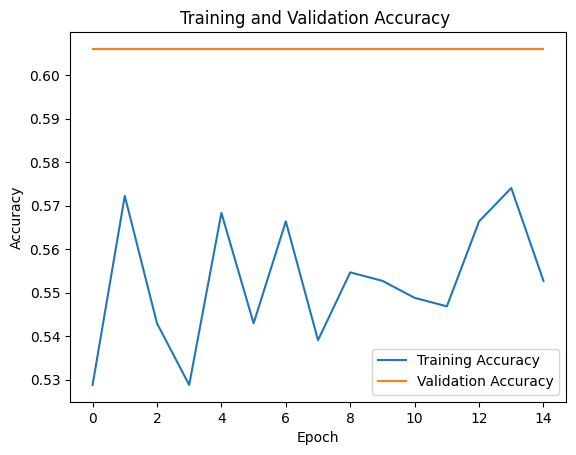

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

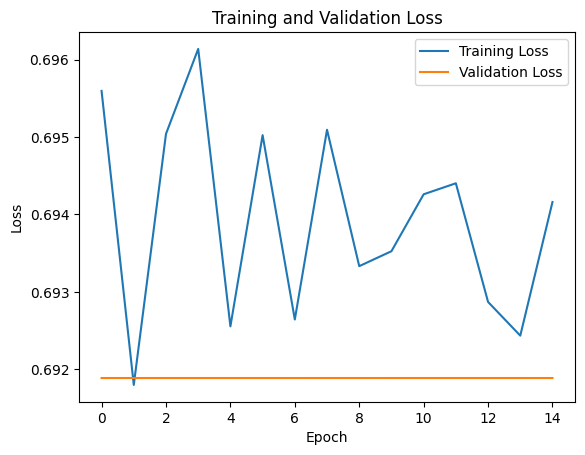

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
batch_size = 32
test_steps = test_generator.samples // batch_size + 1
predictions = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

14/14 [==============================] - 181s 13s/step


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0 116]
 [  0 325]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names based on your dataset
class_names = ['Melanoma Skin Cancer Nevi and Moles', 'Tinea Ringworm Candidiasis and other Fungal Infections']


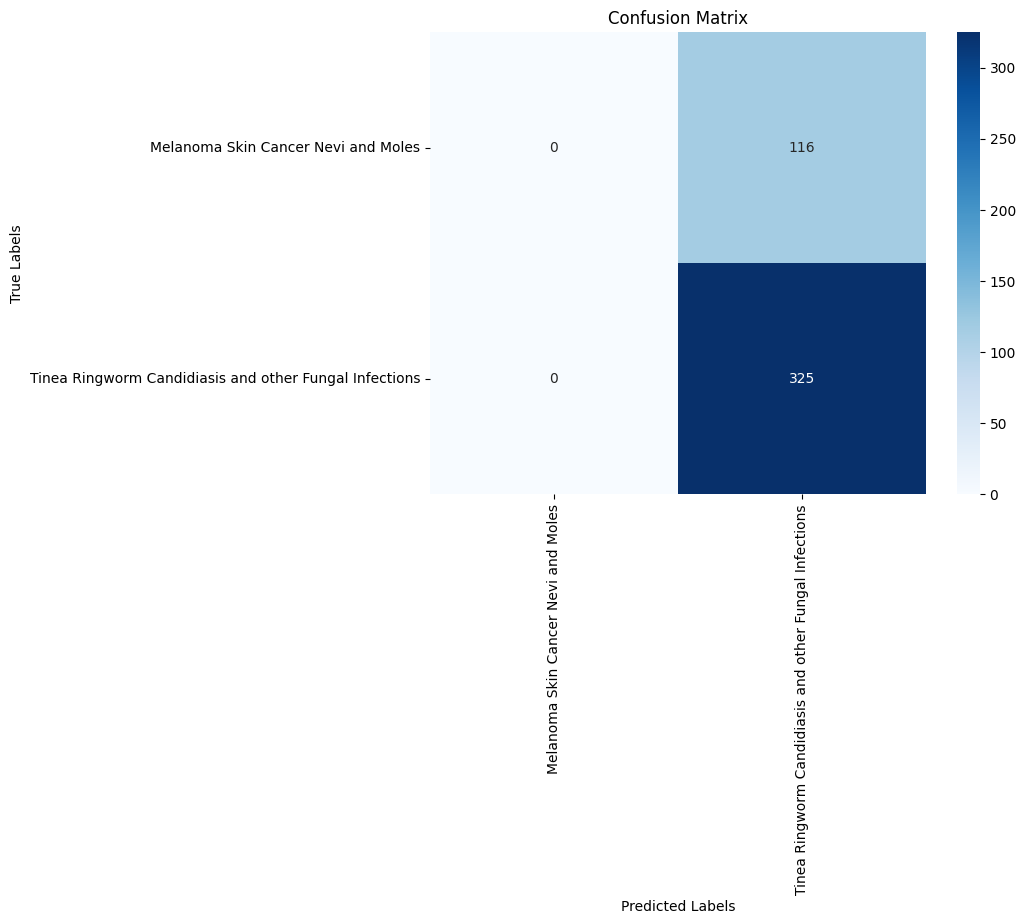

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print classification report
print("Classification Report:")
print(report)


Classification Report:
                                                        precision    recall  f1-score   support

                   Melanoma Skin Cancer Nevi and Moles       0.00      0.00      0.00       116
Tinea Ringworm Candidiasis and other Fungal Infections       0.74      1.00      0.85       325

                                              accuracy                           0.74       441
                                             macro avg       0.37      0.50      0.42       441
                                          weighted avg       0.54      0.74      0.63       441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')
print("\nWeighted F1 Score:", f1)


Weighted F1 Score: 0.6253589338259238


In [ ]:
from sklearn.metrics import accuracy_score

# Compute testing accuracy
Testing_accuracy = accuracy_score(y_true, y_pred)

# Print Testing accuracy
print(" Testing Accuracy:", Testing_accuracy)


 Testing Accuracy: 0.7369614512471655


In [ ]:
# Assuming you have trained the model using the code snippet provided
# You can access the final training and validation accuracy from the history object

# Get the final training and validation accuracy
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

# Print the final training and validation accuracy
print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)


Final Training Accuracy: 0.552734375
Final Validation Accuracy: 0.6060606241226196
